# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
#set() - gives only unique elements
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

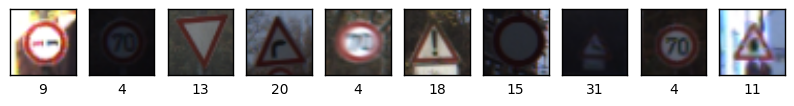

In [4]:
#Randomly 10 images from training set are pickedup  and plotted alongwith the class id 
import numpy as np
import random

fig=plt.figure(figsize=(10,10))
#fig.subplots_adjust(hspace=0.5)
for i in range(10):
    index = random.randint(0,len(X_train))
    img = X_train[index]
    class_id = y_train[index]
    
    ax = fig.add_subplot(1,10,i+1)
    ax.set_xlabel(class_id)
      
    plt.imshow(img)
    ###http://stackoverflow.com/questions/20416609/remove-the-x-axis-ticks-while-keeping-the-grids-matplotlib
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    for tic in ax.xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
        tic.label1On = tic.label2On = False
    for tic in ax.yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
        tic.label1On = tic.label2On = False
    
plt.show()

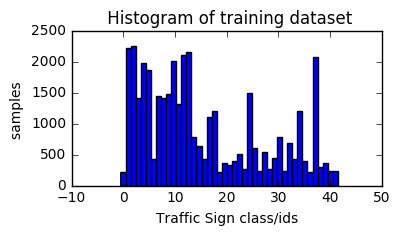

In [5]:
samples_per_class = np.bincount(y_train)

fig = plt.figure(figsize=(4,2))
fig.subplots_adjust(hspace=0.5)
ax1 = fig.add_subplot(1,1,1)
plt.hist(y_train,bins=len(samples_per_class),align='left')
plt.title(" Histogram of training dataset", loc='center')  
plt.xlabel("Traffic Sign class/ids"); plt.ylabel("samples ")  



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [7]:
### Pre-Processing methods

# Standardization
def z_score(image):
    x_np = np.asarray(image)
    z_scores_np = (x_np - x_np.mean()) / x_np.std()
    return z_scores_np

# Min-Max scaling
def minmax(image):
    x_np = np.asarray(image)
    np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())
    return np_minmax



In [8]:
from sklearn.utils import shuffle

### Do preprocessing of training set and test set

X_train = minmax(X_train)
X_test = minmax(X_test)
print('Normalization done')

Normalization done


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

1) **Normalizing** the data dimensions so that they are of approximately the same scale. Used **minmax** scaling to make pixels values in range from 0 to 1, eventhough in case of images, the relative scales of pixels are already approximately equal (and in range from 0 to 255), so it is not strictly necessary to perform this additional preprocessing step.(reference: http://cs231n.github.io/neural-networks-2/#datapre). Images were not normalised individually (across the image), but only across the data set. Same normalization is applied to test set.

2) Keeping the color information without converting to grayscale. Some of pictures in dataset exhibiting motion-blur or partial occlusions were instead easily recognisable to the human eye but gets misclassified if grayscale images are used in training the model.(reference:publications.lib.chalmers.se/records/fulltext/238914/238914.pdf) 

3) The images are minimally preprocessed in accordance with the idea of representation learning 

In [9]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [10]:
### Splitting the data into training and validation sets (80/20 -- training/validation)

In [11]:
from sklearn.model_selection import train_test_split
X_train_split, X_validate_split, y_train_split, y_validate_split = train_test_split(X_train, y_train, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y_train)

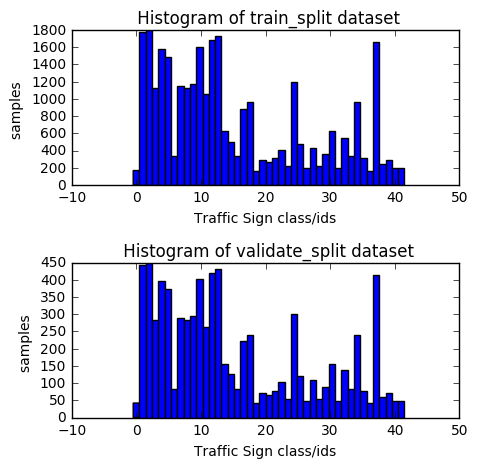

In [12]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.5)

samples_per_class = np.bincount(y_train_split)
ax1 = fig.add_subplot(2,1,1)
plt.hist(y_train_split,bins=len(samples_per_class),align='left')
plt.title(" Histogram of train_split dataset", loc='center')  
plt.xlabel("Traffic Sign class/ids"); plt.ylabel("samples ") 

samples_per_class = np.bincount(y_validate_split)
ax1 = fig.add_subplot(2,1,2)
plt.hist(y_validate_split,bins=len(samples_per_class),align='left')
plt.title(" Histogram of validate_split dataset", loc='center')  
plt.xlabel("Traffic Sign class/ids"); plt.ylabel("samples ") 

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

1) Seen from histogram, the data is imbalanced.i.e classes 0,19 etc have less samples relative to other classes which may result in misclassification by model as prediction will be biased towards higher frequency classes.I didn't use data augmentation, as with large dataset, the computaional power required was heavy and decided to proceed without the same.
2) Split the training dataset into 80/20 split as X_train_split and X_validate_split. The split is stratified to ensure that  the overall class distribution is preserved for each individual set  

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# **SOLUTION: Implement LeNet-Modified**

**Implement the LeNet based neural network architecture.**

**Input**

The LeNet modified architecture accepts a 32x32xC image as input, where C is the number of color channels. Since GTSRB images are RGB, C is 3 in this case.

**Architecture**

**Layer 1: Convolutional.C1 feature maps 32@28x28 **

Using small filter (5x5).

Number of filters is 32

The output shape should be 28x28x32.

**Activation** 

RELU function

**Pooling: Max pooling stride(2,2)**

The output shape should be 14x14x32.

**Layer 2: Convolutional. C2 feature maps 64@10x10 **

Using small filter (5x5).

Number of filters is 64

The output shape should be 10x10x64.

**Activation**

RELU function

**Pooling: Max pooling stride(2,2)**

The output shape should be 5x5x64.

**Skip-Connection**

The output of convolutional layer C1 + output of C2 are connected to FC1(Fully connected layer)

**Flatten**

Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten

**Layer 3: Fully Connected(FC1).**

This should have 1024 outputs. 

**Activation** 

RELU function

Applied drop out of probability 0.5

**Layer 4: Fully Connected(FC2)**

This should have 512 outputs. 

**Activation**

RELU function

Applied drop out of probability 0.5

**Layer 5: Fully Connected (Logits). This should have 43 outputs.

**Output**

Return the result of the 2nd fully connected layer.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
The final architecture used is detailed above. Briefed as below:

Based on LeNet-5 model modified to support 3 color channels,having same number of 7 layers ( 2 convolutional layers, 2 subsampling layers,3 Fully connected layers) as LeNet-5 baseline model.But number of filters is 32 for conv1 layer, 64 for conv2 layer. Dropout are applied on FC1 and Fc2.Skip-connection is applied (o/p of conv1 dirctly connected to FC1).Output layer having 43 outputs.

In [14]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [15]:
import tensorflow as tf

EPOCHS = 150
BATCH_SIZE = 128

In [16]:
from tensorflow.contrib.layers import flatten

keep_prob = tf.placeholder(tf.float32)
# Remember the placeholder keep_prob we want to  by adding it to a collection.
tf.add_to_collection('keep_prob', keep_prob)

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Add skip-connection
    # SOLUTION: Flatten. Input = 5x5x64 + 14x14x32. Output = 7872.
    fc00   = flatten(conv2)
    fc01   = flatten(conv1)
    
    fc0 = tf.concat(1,[fc00,fc01])

       
    # SOLUTION: Layer 3: Fully Connected. Input = 7872. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(7872, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    # Added Dropout
    fc1_drop = tf.nn.dropout(fc1, keep_prob)
    

    # SOLUTION: Layer 4: Fully Connected. Input = 1024. Output = 512.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024,512), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(512))
    # modified below
    #fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.matmul(fc1_drop, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    # Added dropout
    fc2_drop = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 512. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    # modified below
    #logits = tf.matmul(fc2, fc3_W) + fc3_b
    logits = tf.matmul(fc2_drop, fc3_W) + fc3_b
    # Remember the logits we want to  by adding it to a collection.
    tf.add_to_collection('logits', logits)
    # Will be used for regularization
    weights = [conv1_W,conv2_W,fc1_W,fc2_W,fc3_W]
    
    return logits,weights

# **Features and Labels**

In [17]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
# Remember the placeholder x and y we want to  by adding it to a collection.
tf.add_to_collection('x', x)
tf.add_to_collection('y', y)
one_hot_y = tf.one_hot(y, 43)

# **Training Pipeline**

In [18]:
rate = 0.001

logits,weights = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
# L2 Regularization 
regularizers = 0.0
for weight in weights:
    regularizers +=tf.nn.l2_loss(weight)

# Add the regularization to the loss
loss_operation = tf.reduce_mean(cross_entropy) + 1e-5 * regularizers

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# **Model Evaluation**

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# Remember the op accuracy operation  we want to  by adding it to a collection.
tf.add_to_collection('accuracy_operation', accuracy_operation)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples,total_loss / num_examples

# **Train the Model**

In [20]:
def learningcurvesplot(training_accuracies,validation_accuracies,training_losses,validation_losses):
    fig = plt.figure(1)
    
    plt.subplot(211)
    red_line, = plt.plot(training_accuracies, "r-", markeredgewidth = 5, markersize=5)
    blue_line, = plt.plot(validation_accuracies, "b-", markeredgewidth = 5, markersize=15)

    plt.legend([red_line,  blue_line], ["training_accuracies", "validation_accuracies"])
    ##fig.suptitle('Accuracy plot')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    #fig.savefig('test.jpg')
    
    plt.subplot(212)
    red_line, = plt.plot(training_losses, "r-", markeredgewidth = 5,markersize=5)
    blue_line, = plt.plot(validation_losses, "b-", markeredgewidth =5, markersize=5)

    plt.legend([red_line, blue_line], ["training_losses", "validation_losses"])
    fig.suptitle('Accuracy and Loss plots')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    fig.savefig('learningcurves.jpg')
    
    


Training...

EPOCH 1 ...
Training Accuracy = 0.871 Validation Accuracy = 0.857
Training Loss = 0.757 Validation Loss = 0.797

EPOCH 11 ...
Training Accuracy = 0.998 Validation Accuracy = 0.991
Training Loss = 0.228 Validation Loss = 0.255

EPOCH 21 ...
Training Accuracy = 0.999 Validation Accuracy = 0.994
Training Loss = 0.174 Validation Loss = 0.197

EPOCH 31 ...
Training Accuracy = 1.000 Validation Accuracy = 0.996
Training Loss = 0.142 Validation Loss = 0.164

EPOCH 41 ...
Training Accuracy = 0.999 Validation Accuracy = 0.993
Training Loss = 0.124 Validation Loss = 0.158

EPOCH 51 ...
Training Accuracy = 1.000 Validation Accuracy = 0.996
Training Loss = 0.113 Validation Loss = 0.138

EPOCH 61 ...
Training Accuracy = 1.000 Validation Accuracy = 0.996
Training Loss = 0.102 Validation Loss = 0.136

EPOCH 71 ...
Training Accuracy = 0.999 Validation Accuracy = 0.993
Training Loss = 0.105 Validation Loss = 0.141

EPOCH 81 ...
Training Accuracy = 0.999 Validation Accuracy = 0.995
Training 

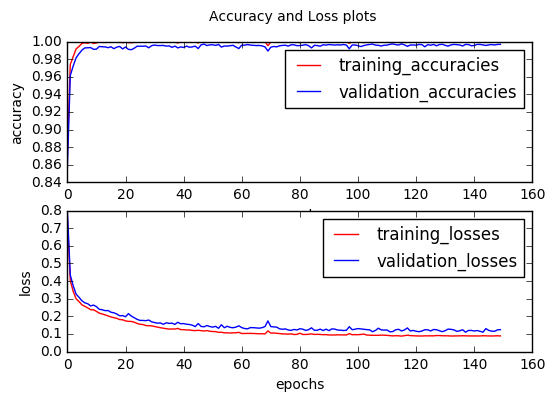

In [21]:
import math
import os

TRAIN_DIR = './'

training_accuracies = []
validation_accuracies = []
training_losses = []
validation_losses =[]


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_split)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_split, y_train_split = shuffle(X_train_split, y_train_split)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_split[offset:end], y_train_split[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        #Added for collecting training accuracy,training loss for ploting
        training_accuracy,training_loss = evaluate(X_train_split, y_train_split)
        training_accuracies.append(training_accuracy)
        training_losses.append(training_loss)
                
        validation_accuracy,validation_loss = evaluate(X_validate_split, y_validate_split)
        validation_accuracies.append(validation_accuracy)
        validation_losses.append(validation_loss)
        
        if i%10 == 0:
            print("EPOCH {} ...".format(i+1))
            print("Training Accuracy = {:.3f} Validation Accuracy = {:.3f}".format(training_accuracy,validation_accuracy))
            print("Training Loss = {:.3f} Validation Loss = {:.3f}".format(training_loss,validation_loss))
            print()
        
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    checkpoint_path = os.path.join(TRAIN_DIR, 'lenet_traffic_skipconnection')
    saver.save(sess, checkpoint_path)
    #saver.save(sess, save_file)
    print("Model saved")
    learningcurvesplot(training_accuracies,validation_accuracies,training_losses,validation_losses)

# **Evaluate Model**

In [22]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet_traffic_skipconnection.meta')
    loader.restore(sess, tf.train.latest_checkpoint(TRAIN_DIR))
    
    X_test = minmax(X_test)
        
    test_accuracy,test_loss = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.970


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Hyperparameters used are:

1) Drop out applied at FCs :0.5 

2) L2 Regularization : 1e-5

3) Epochs : 150

4) Batch Size : 128

5) Adam optimizer

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

It has been the trial and error process but with some directions provided by various research papers.

**Steps followed:**

**Step 1) **

Adopted LeNet-5 model as such modified to take color channels(3) and classifier of 43. The validation accuracy converged to 99.3% compared to Training accuracy of ~100% and was not improving further even after 150 epochs.This validation accuracy is high enough to run model on test set.(The drawback is validation dataset is not stochastically independent of training set as it is splited from overall training set).The test accuracy is 94.1%.There is almost 5.2% difference compared to validation accuracy, because of overfitting.

**Step 2) **

To tackle overfitting, multiple techniques are proposed by articles on Convnets eg.,http://cs231n.github.io/neural-networks-2/#reg

- **Drop out:** 
    Applied on FC1 and FC2,by only keeping a neuron active with some probability  p=0.5. The validation accuracy converged more or less as before.Trusting , dropout is one of extremely powerful method as believed, run the test set and reached test accuracy of 95.3% certainly improvement of 1.2%
    

- **L2 regularization:**
    By observing as before not much difference and with dropout+L2 ,test accuracy improved to 95.9% but not much.

- **Increasing number of filters(to get more detailed features) and tried with skip-connection (reference Pierre Sermanet and Yann LeCun white paper)** 
    skip-connections would help combining global features extracted by the second stage with local and more detailed features learned by the ﬁrst one as claimed by authors
    
    Observed the validation accuracy increased to 99.7+/-0.1, and proceeded with running the trained model on test set , reached a test accuracy of ***97.0%***
    The iteration EPOCH is run for 150, but observed the training loss and validation losses are still decreasing.But further run stopped due time consumption(took approx 40 minutes on AWS g2.2xlarge instance)
    

- **Data Augmentation:**
   Not considered due to computational power demanded to run the large dataset.This will certainly improve the prediction on real world pictures as memorizing (overfitting) will be avoided and it generalizes.This will be one of my option to try in future.  


Didn't try with playing around hyperparameters like Regularization factor, dropout probabilty, learning rate as it matches with recommended ones by articles. 

With data augmentation using , more informations can be obtained from training and validation accuracies and losses learning curves to understand the model behaviour and train best model to predict the real world pictures accurately.
Rather than concluding prematurely on seeing validation accuracy almost as nearing training accuracy since using less data and not having training and validation set stochastically independent.

**Conclusion: Without data augmentation able to achieve 97.0% as test accuracy is decent enough  but not the best as per my knowledge.**






---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

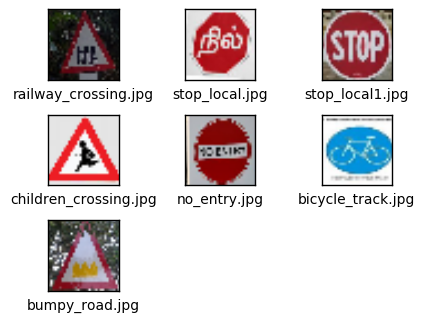

In [23]:
import os
from skimage.transform import resize
import matplotlib.image as mpimg
#List all filenames from dir test_images
i=1
filenames = os.listdir("test_signimages/")
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.5)
#fig=plt.figure(figsize=(10,10))
for filename in filenames:
    image = mpimg.imread('test_signimages/'+filename)
    ax = fig.add_subplot(4,3,i)
    
    ax.set_xlabel(filename)
    image_resize = resize(image, (32, 32))
    plt.imshow(image_resize)
    i=i+1
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    for tic in ax.xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
        tic.label1On = tic.label2On = False
    for tic in ax.yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
        tic.label1On = tic.label2On = False
    #plt.axis('off')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

**1)STOP sign:** Two Local STOP signs which are different from trained STOP sign.

**2)Railway Crossing sign:** Not trained for. 

**3)Bumpy road sign:** Bumps are colored yellow, but trained ones are black

**4)No entry sign :** Having "No entry" text at center of sign.

**5)Bicycle track sign :** This is different from Bicycle crossing sign

In [24]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

railway_crossing.jpg
 Class_id:28  confidence:100%
 Class_id:36  confidence:0%
 Class_id: 3  confidence:0%
 Class_id:23  confidence:0%
 Class_id: 0  confidence:0%


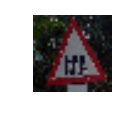

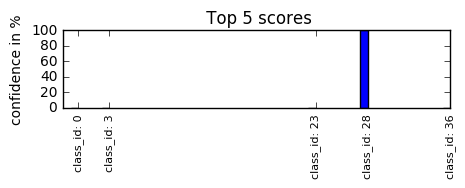

stop_local.jpg
 Class_id:14  confidence:100%
 Class_id: 0  confidence:0%
 Class_id: 1  confidence:0%
 Class_id: 2  confidence:0%
 Class_id: 3  confidence:0%


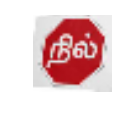

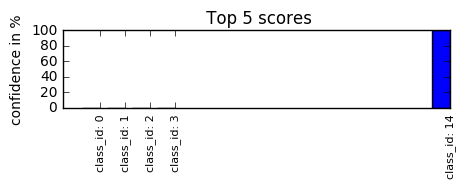

stop_local1.jpg
 Class_id:14  confidence:100%
 Class_id: 5  confidence:0%
 Class_id:29  confidence:0%
 Class_id: 3  confidence:0%
 Class_id:10  confidence:0%


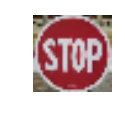

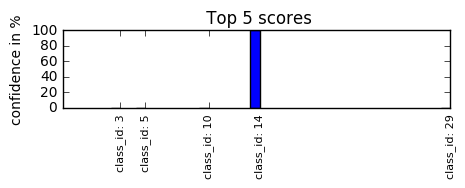

children_crossing.jpg
 Class_id:11  confidence:100%
 Class_id:21  confidence:0%
 Class_id:31  confidence:0%
 Class_id:18  confidence:0%
 Class_id:27  confidence:0%


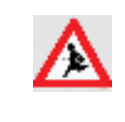

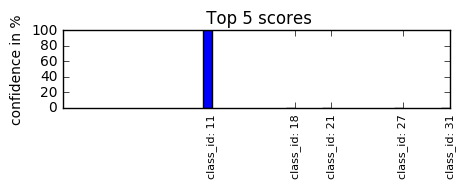

no_entry.jpg
 Class_id:17  confidence:100%
 Class_id:14  confidence:0%
 Class_id: 0  confidence:0%
 Class_id: 1  confidence:0%
 Class_id: 2  confidence:0%


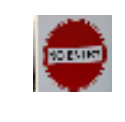

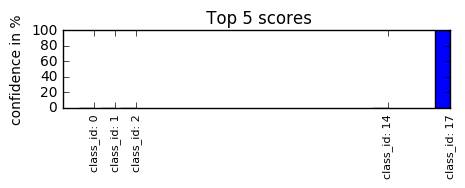

bicycle_track.jpg
 Class_id:38  confidence:100%
 Class_id:39  confidence:0%
 Class_id:34  confidence:0%
 Class_id:33  confidence:0%
 Class_id:40  confidence:0%


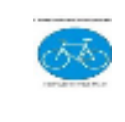

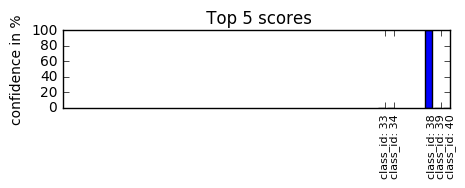

bumpy_road.jpg
 Class_id:17  confidence:100%
 Class_id:14  confidence:0%
 Class_id:13  confidence:0%
 Class_id:26  confidence:0%
 Class_id:15  confidence:0%


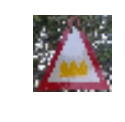

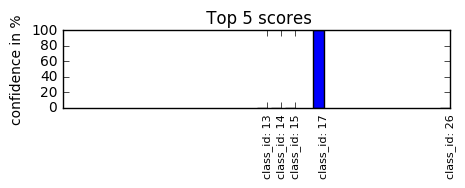

In [25]:
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.transform import resize
import matplotlib.image as mpimg
import os

filenames = os.listdir("test_signimages/")

#fig.subplots_adjust(hspace=0.5)


with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet_traffic_skipconnection.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    # tf.get_collection() returns a list. In this example we only want the first one.
    accuracy_operation=tf.get_collection('accuracy_operation')[0]
    
    x=tf.get_collection('x')[0]
    y=tf.get_collection('y')[0]
    keep_prob=tf.get_collection('keep_prob')[0]
    logits=tf.get_collection('logits')[0]
    
    predict_confidences =[]
    indices_array=[]
    i=1
    for filename in filenames:
        image = mpimg.imread('test_signimages/'+filename)
        
        test_image = resize(image, (32, 32))
        #as imread is normalized one and no need to preproc 
        #test_image_preproc = minmax(test_image) 
        test_image_preproc = test_image
    
        test_prediction = tf.nn.softmax(logits)
        classification = sess.run(test_prediction,feed_dict = {x: [test_image_preproc],keep_prob:1.0})
        test_class = sess.run(tf.argmax(classification,1))
        value,indices = sess.run(tf.nn.top_k(tf.constant(classification), k=5))
        
        predict_confidence=value.squeeze()
        indices = indices.squeeze()
        print(filename)
        fig = plt.figure(figsize=(1,1))
        plt.imshow(test_image)
        plt.axis('off')
        for j in range(0,5):
            print ( ' Class_id:{0:2d}  confidence:{1:.0%}'.format((indices[j]),(predict_confidence[j])))
        
        classes = indices.squeeze()                # the x locations 
        width = 0.75                      # the width of the bars
        fig = plt.figure(figsize=(5,1))
        ax = fig.add_subplot(111)
        
        rect = ax.bar(classes, predict_confidence*100, width,
                color='blue')

        # axes and labels
        ax.set_xlim(-width,len(classes)+width)
        ax.set_ylim(0,100)
        ax.set_ylabel('confidence in %')
        ax.set_title(' Top 5 scores')
        xTickMarks = ['class_id: '+str(classes[k]) for k in range(0,len(classes))]
        ax.set_xticks(classes+width)
        xtickNames = ax.set_xticklabels(xTickMarks)
        plt.setp(xtickNames, rotation=90, fontsize=8)
        i=i+1
        
        plt.show()
        plt.close
        
        



### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

On Choosen images

**1) STOP signs:**

First STOP sign having written in local language(different than training samples)  and having polygon edges(same as in training samples) - predicted with almost near 100% confidence

Second STOP sign having STOP text (same as training samples) but inside circular sign(different than training samples)- predicted with almost near 100% confidence

**2) No entry sign:**

Having 'No entry' text in center of traffic sign(different than training samples) - predicted with almost near 100% confidence

**3) Railway crossing sign:**

Not part of training set, but partially able to match children crossing sign but with prediction with approx 100% .This is expected to be less.Need to analyse.

**4) Bumpy Road sign:**

Part of training set but with gray color.Used for testing is yellow color.
Not able to predict(failed).May be if i use grayscale inputs for training rather than all color channels, this problem could have resolved but affecting some other pictures classification

**5) BiCycle track sign:**

This is completely different than Bicycle crossing sign only similarity is having bicycle picture in sign. Expected to predict at least with that feature but failed.


Overall for the six images undertaken to identify the accuracy of prediction, 3 out of 6 are able to predict correctly resulting in  50% accurate

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

# In above cells, the softmax probabilities are plotted as bar chart, representing as "confidence(values) in % as Y-axis and corresponding Class_ids(indices) as X-axis" after running 

**value,indices = sess.run(tf.nn.top_k(tf.constant(classification), k=5))**

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

**value,indices = sess.run(tf.nn.top_k(tf.constant(classification), k=5)) function is used in one of above cell used for prediction and printed value in percentage and corresponding class_ids as indices for top k=5 predictions and also plotted bar chart for corresponing test images.**

**Observed that all predictions are almost with certain 100% whether correctly classified or misclassified.
Need further study to understand this behaviour.**  




> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.